# LapSense: Leveraging Data Science Forecasts to Strengthen Laptop Shopping

# In this file we can see the following things being covered : Splitting the data into testing and training data. Data scaling.Regression and evaluation Model. non linear comparision


# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import missingno as msno 
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

# Importing the cleaned dataset.

In [302]:
df = pd.read_csv("cleaneddata.csv",encoding = 'latin-1')

In [303]:
df.head(10)

,Company,TypeName,Ram,OpSys,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080
5,Acer,Notebook,4,Windows,0,0,100.454670,AMD Processor,500,0,AMD,21312.0000
6,Apple,Ultrabook,16,Mac,0,1,220.534624,Intel Core i7,0,0,Intel,114017.6016
7,Apple,Ultrabook,8,Mac,0,0,127.677940,Intel Core i5,0,0,Intel,61735.5360
8,Asus,Ultrabook,16,Windows,0,0,157.350512,Intel Core i7,0,512,Nvidia,79653.6000
9,Acer,Ultrabook,8,Windows,0,1,157.350512,Intel Core i5,0,256,Intel,41025.6000


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   OpSys        1302 non-null   object 
 4   TouchScreen  1302 non-null   int64  
 5   IPS          1302 non-null   int64  
 6   PPI          1302 non-null   float64
 7   CPU_name     1302 non-null   object 
 8   HDD          1302 non-null   int64  
 9   SSD          1302 non-null   int64  
 10  Gpu brand    1302 non-null   object 
 11  Price        1302 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.2+ KB


In [306]:
df.corr()['Price']

Ram            0.742905
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Price          1.000000
Name: Price, dtype: float64

<AxesSubplot:>

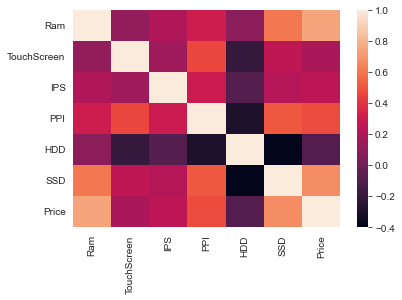

In [307]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

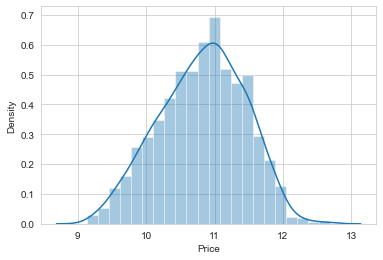

In [308]:
sns.distplot(np.log(df['Price']))

# Data Splitting

In [310]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [311]:
x

,Company,TypeName,Ram,OpSys,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1,1,157.350512,Intel Core i7,0,128,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1,1,276.053530,Intel Core i7,0,512,Intel
1299,Lenovo,Notebook,2,Windows,0,0,111.935204,Other Intel Processor,0,0,Intel
1300,HP,Notebook,6,Windows,0,0,100.454670,Intel Core i7,1000,0,AMD


In [312]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

# Regression

# Importing the library

In [313]:
from sklearn.model_selection import train_test_split

In [315]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [316]:
x_train

,Company,TypeName,Ram,OpSys,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
1067,Dell,2 in 1 Convertible,8,Windows,1,0,165.632118,Intel Core i7,0,256,Intel
1233,Apple,Ultrabook,4,Mac,0,0,135.094211,Intel Core i5,0,0,Intel
1087,Lenovo,Notebook,8,Windows,0,0,157.350512,Intel Core i5,0,180,Intel
266,Asus,2 in 1 Convertible,8,Windows,1,0,165.632118,Intel Core i7,0,1024,Intel
327,Asus,Ultrabook,8,Windows,0,0,141.211998,Intel Core i7,0,256,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,Windows,0,0,141.211998,Intel Core i5,1000,256,Nvidia
1130,HP,Notebook,8,Windows,0,0,100.454670,Intel Core i7,2000,0,Intel
1294,Dell,Notebook,8,Other,0,0,100.454670,Intel Core i7,1000,0,AMD
860,Lenovo,Notebook,8,Windows,0,1,141.211998,Intel Core i5,1000,0,Intel


In [317]:
x_train.shape

(976, 11)

In [318]:
x_test.shape

(326, 11)

In [319]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [320]:
y_train

1067    10.657682
1233    10.841452
1087    11.064804
266     11.288115
327     10.932011
          ...    
1095    10.658922
1130    10.419692
1294    10.667632
860     10.721574
1126    10.147262
Name: Price, Length: 976, dtype: float64

In [321]:
y_test

478     10.490274
724     11.182294
312     11.624777
851     11.524644
1275    10.104611
          ...    
526     10.658922
718      9.555291
667     10.588945
290      9.268866
285     10.466285
Name: Price, Length: 326, dtype: float64

In [322]:
y_train.shape

(976,)

In [323]:
y_test.shape

(326,)

# Changing useful categorical data into the numerical data. Using one hot encoding

In [324]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [331]:
df.head(1)

,Company,TypeName,Ram,OpSys,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832


In [332]:
ColChange = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,7,10])
],remainder='passthrough')

In [400]:
df.head(10)

,Company,TypeName,Ram,OpSys,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080
5,Acer,Notebook,4,Windows,0,0,100.454670,AMD Processor,500,0,AMD,21312.0000
6,Apple,Ultrabook,16,Mac,0,1,220.534624,Intel Core i7,0,0,Intel,114017.6016
7,Apple,Ultrabook,8,Mac,0,0,127.677940,Intel Core i5,0,0,Intel,61735.5360
8,Asus,Ultrabook,16,Windows,0,0,157.350512,Intel Core i7,0,512,Nvidia,79653.6000
9,Acer,Ultrabook,8,Windows,0,1,157.350512,Intel Core i5,0,256,Intel,41025.6000


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   OpSys        1302 non-null   object 
 4   TouchScreen  1302 non-null   int64  
 5   IPS          1302 non-null   int64  
 6   PPI          1302 non-null   float64
 7   CPU_name     1302 non-null   object 
 8   HDD          1302 non-null   int64  
 9   SSD          1302 non-null   int64  
 10  Gpu brand    1302 non-null   object 
 11  Price        1302 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.2+ KB


# Creating an instance of linear regression

In [333]:
le = LinearRegression()

In [334]:
pipe = Pipeline([
    ('step1',ColChange),
    ('step2',le)
])


# Fitting the model

In [335]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 7, 10])])),
                ('step2', LinearRegression())])

# Predicting the model

In [346]:
y_pred = pipe.predict(x_test)

In [347]:
y_pred

array([10.65982786, 11.14583473, 11.52955552, 11.26244637, 10.29822887,
       11.12008004, 12.29046876, 11.14500798, 11.05891581, 10.1774025 ,
        9.87907921, 11.47560579, 11.13559921, 11.13559921, 11.51534283,
       10.57328718, 10.28816633, 10.16848244, 11.15153187, 10.62748762,
       10.53402905, 10.8143082 , 10.25241818, 10.53302578, 10.64252749,
       10.95369452, 11.54109247, 10.66826638,  9.95425268, 11.48103409,
       10.29822887, 12.78411952, 10.24555225, 11.08672127, 10.9747477 ,
       10.04141141, 11.18169149, 10.94489411, 11.38216365,  9.97575893,
       11.02849147, 10.47883535, 10.16761191, 10.31290395, 11.96641035,
       11.13795682, 11.46747452,  9.92987766, 10.55132942, 11.46903757,
       11.05262573, 10.22358376, 12.0462736 , 12.17945043,  9.59715233,
       11.88548098, 10.90264766, 11.04035895, 10.81806088, 10.81442449,
       10.08785731, 10.84712868, 10.87448865, 10.66509377, 11.47601562,
       11.07039283, 10.81325962, 10.90064495,  9.64223691, 10.24

# Checking accuracy

In [338]:
r2_score(y_test,y_pred)

0.7990346618391891

In [339]:
mean_absolute_error(y_test,y_pred)

0.21423280485060076

In [340]:
new1 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new1.head(10)

,Y_test,Y_predict
478,10.490274,10.659828
724,11.182294,11.145835
312,11.624777,11.529556
851,11.524644,11.262446
1275,10.104611,10.298229
115,11.219067,11.120080
816,11.470547,12.290469
722,11.288115,11.145008
1142,11.371283,11.058916
101,9.830633,10.177403


In [348]:
y_test

478     10.490274
724     11.182294
312     11.624777
851     11.524644
1275    10.104611
          ...    
526     10.658922
718      9.555291
667     10.588945
290      9.268866
285     10.466285
Name: Price, Length: 326, dtype: float64

In [349]:
y_pred

array([10.65982786, 11.14583473, 11.52955552, 11.26244637, 10.29822887,
       11.12008004, 12.29046876, 11.14500798, 11.05891581, 10.1774025 ,
        9.87907921, 11.47560579, 11.13559921, 11.13559921, 11.51534283,
       10.57328718, 10.28816633, 10.16848244, 11.15153187, 10.62748762,
       10.53402905, 10.8143082 , 10.25241818, 10.53302578, 10.64252749,
       10.95369452, 11.54109247, 10.66826638,  9.95425268, 11.48103409,
       10.29822887, 12.78411952, 10.24555225, 11.08672127, 10.9747477 ,
       10.04141141, 11.18169149, 10.94489411, 11.38216365,  9.97575893,
       11.02849147, 10.47883535, 10.16761191, 10.31290395, 11.96641035,
       11.13795682, 11.46747452,  9.92987766, 10.55132942, 11.46903757,
       11.05262573, 10.22358376, 12.0462736 , 12.17945043,  9.59715233,
       11.88548098, 10.90264766, 11.04035895, 10.81806088, 10.81442449,
       10.08785731, 10.84712868, 10.87448865, 10.66509377, 11.47601562,
       11.07039283, 10.81325962, 10.90064495,  9.64223691, 10.24

In [350]:
new1

,Y_test,Y_predict
478,10.490274,10.659828
724,11.182294,11.145835
312,11.624777,11.529556
851,11.524644,11.262446
1275,10.104611,10.298229
...,...,...
526,10.658922,10.644762
718,9.555291,9.615607
667,10.588945,10.734812
290,9.268866,9.542461


# Evaluating

In [341]:
p = x_train.shape[1]
n = len(y_train)
adj_R2 = 1 - (reg_score) * (n - 1) / (n - p - 1)
adj_R2

0.3050935621336638

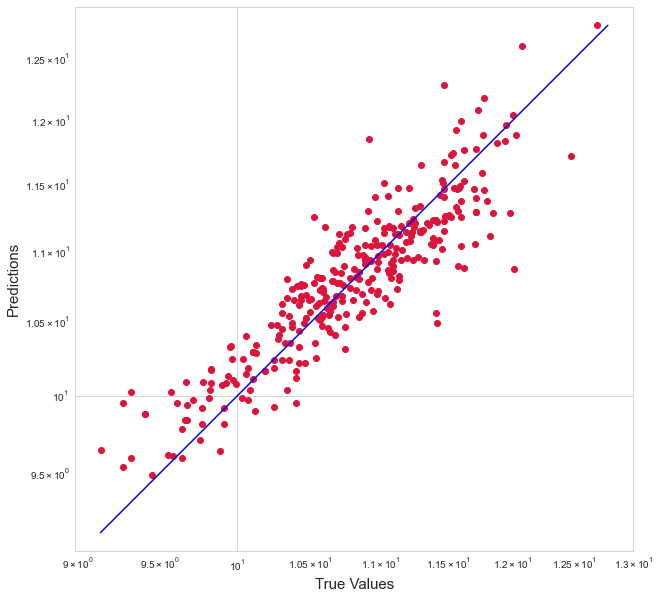

In [352]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

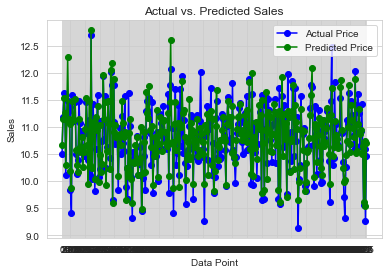

In [354]:
# Plot actual sales as a blue line
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price', marker='o', linestyle='-')

# Plot predicted sales as a green line
plt.plot(range(len(y_pred)), y_pred, color='green', label='Predicted Price', marker='o', linestyle='-')

# Customize the x-axis ticks (e.g., assuming each point corresponds to a time period)
x_ticks = [str(i) for i in range(len(y_test))]  # You can replace this with appropriate labels
plt.xticks(range(len(y_test)), x_ticks)

plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='best')
plt.grid(True)

plt.legend()
plt.show()

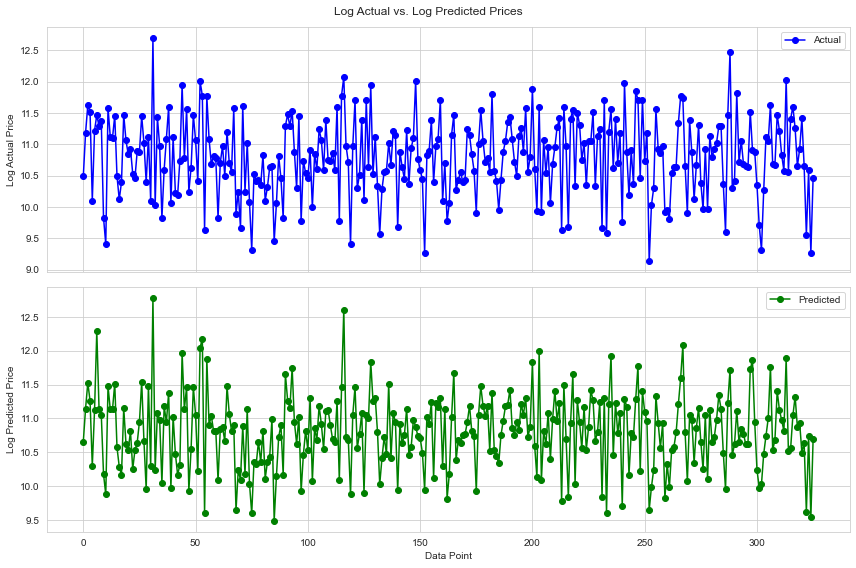

In [355]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot actual sales in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='Actual', marker='o', linestyle='-')
ax1.set_ylabel('Log Actual Price')
ax1.grid(True)
ax1.legend(loc='best')

# Plot predicted sales in the second subplot
ax2.plot(range(len(y_pred)), y_pred, color='green', label='Predicted', marker='o', linestyle='-')
ax2.set_xlabel('Data Point')
ax2.set_ylabel('Log Predicted Price')
ax2.grid(True)
ax2.legend(loc='best')

# Set a common title for both subplots
plt.suptitle('Log Actual vs. Log Predicted Prices')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

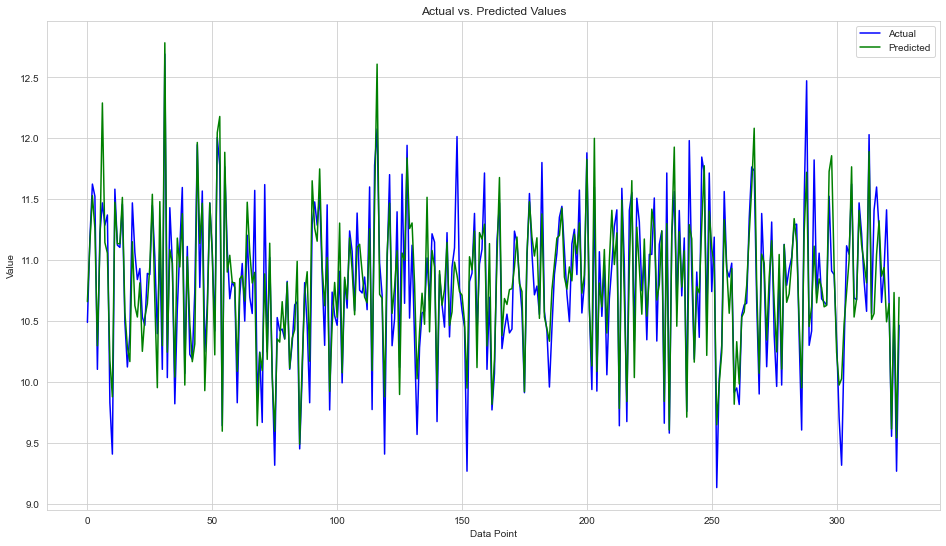

In [365]:
plt.figure(figsize=(16, 9))

# Plot actual values
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot predicted values
plt.plot(range(len(y_test)), y_pred, color='green', label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Lasso Regression

In [367]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [368]:
ColChange = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,7,10])
],remainder='passthrough')

In [369]:
La = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',ColChange),
    ('step2',La)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

In [370]:
y_pred

array([10.65627129, 11.11670179, 11.48978096, 11.28621436, 10.25447315,
       11.12410474, 11.97851092, 11.14307867, 11.08619159, 10.19717474,
        9.82480152, 11.48665483, 11.11937416, 11.11937416, 11.45676375,
       10.59227031, 10.26642767, 10.1464488 , 11.15993848, 10.66105859,
       10.50090766, 10.80762444, 10.221638  , 10.5487086 , 10.61457996,
       10.97496363, 11.54063256, 10.6802723 ,  9.95619828, 11.55013736,
       10.25447315, 12.51610195, 10.21775222, 11.06031636, 10.99567892,
       10.03146435, 11.20017226, 10.93493035, 11.41146757,  9.90728641,
       10.97129282, 10.49127812, 10.19269324, 10.29942508, 11.61506068,
       11.08851636, 11.51693519,  9.8945487 , 10.54259899, 11.23104896,
       11.03872794, 10.30232079, 12.05110211, 12.20290929,  9.66095406,
       11.85689988, 10.87724027, 11.05088166, 10.81733236, 10.78727203,
       10.11171836, 10.9172205 , 10.87201169, 10.72433215, 11.47162338,
       11.09524624, 10.77331589, 10.80846317,  9.87160262, 10.26

In [372]:
r2_score(y_test,y_pred)

0.8024701487423161

In [373]:
mean_absolute_error(y_test,y_pred)

0.21711636653314587

# Evaluation

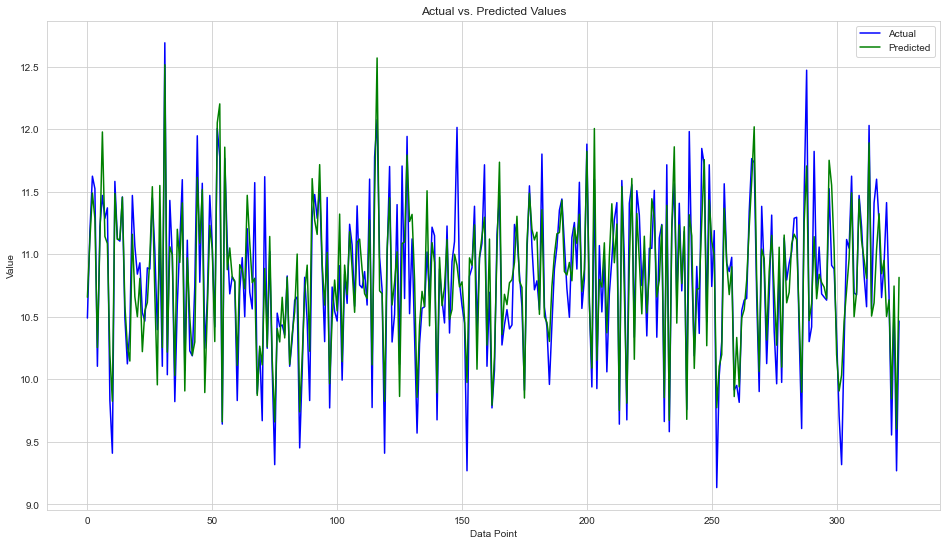

In [374]:
plt.figure(figsize=(16, 9))

# Plot actual values
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot predicted values
plt.plot(range(len(y_test)), y_pred, color='green', label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Random forest regressor

In [375]:
ColChange = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,7,10])
],remainder='passthrough')


In [376]:
rer = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [377]:
pipe = Pipeline([
    ('step1',ColChange),
    ('step2',rer)
])


In [378]:
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)


In [379]:
y_pred

array([10.56018869, 11.14718204, 11.43651809, 11.40758251, 10.12078029,
       10.91704857, 11.71608851, 11.23823061, 11.10959683, 10.20450779,
        9.51020275, 11.36418598, 11.02833159, 11.02833159, 11.28182014,
       10.51848787, 10.24408584, 10.25792584, 11.15189227, 10.58663628,
       10.49574503, 10.93902224, 10.31238777, 10.42828781, 10.47299   ,
       10.87617181, 11.54567997, 10.73565069,  9.98795067, 11.69785041,
       10.12078029, 12.21018379, 10.20528656, 11.22964311, 11.24750915,
        9.90243855, 11.15542956, 11.01076511, 11.52077422,  9.86438832,
       11.08502204, 10.43244483, 10.18993519, 10.17605552, 11.67161629,
       11.17251781, 11.3257081 ,  9.9389858 , 10.4831287 , 11.45331323,
       10.90199092, 10.24181563, 11.94417808, 11.53543304,  9.67340006,
       11.48681537, 11.11231678, 11.15006054, 11.08895982, 10.69747354,
        9.9618842 , 10.89484562, 11.1931737 , 10.59577452, 11.53427409,
       10.70618182, 10.78446973, 11.02393693,  9.65913814, 10.27

In [380]:
r2_score(y_test,y_pred)

0.8544829547059273

In [381]:
mean_absolute_error(y_test,y_pred)

0.1872038991154035

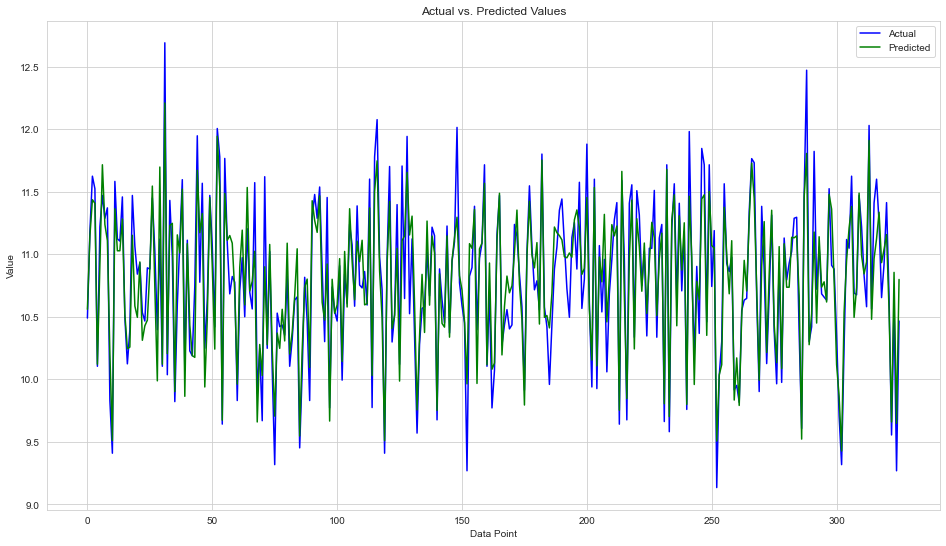

In [382]:
plt.figure(figsize=(16, 9))

# Plot actual values
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot predicted values
plt.plot(range(len(y_test)), y_pred, color='green', label='Predicted')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


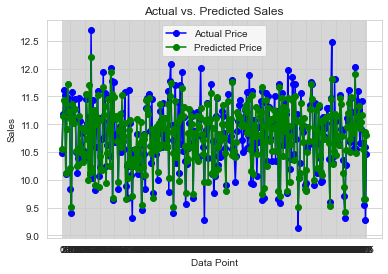

In [383]:
# Plot actual sales as a blue line
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price', marker='o', linestyle='-')

# Plot predicted sales as a green line
plt.plot(range(len(y_pred)), y_pred, color='green', label='Predicted Price', marker='o', linestyle='-')

# Customize the x-axis ticks (e.g., assuming each point corresponds to a time period)
x_ticks = [str(i) for i in range(len(y_test))]  # You can replace this with appropriate labels
plt.xticks(range(len(y_test)), x_ticks)

plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='best')
plt.grid(True)

plt.legend()
plt.show()

# GradientBoostingRegressor

In [385]:
from sklearn.ensemble import GradientBoostingRegressor

In [389]:
ColChange = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,7,10])
],remainder='passthrough')

In [390]:
GBR = GradientBoostingRegressor(n_estimators=500)

In [391]:
pipe = Pipeline([
    ('step1',ColChange),
    ('step2',GBR)
])

In [392]:
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

In [393]:
y_pred

array([10.58320668, 11.22608465, 11.40744275, 11.35257258, 10.17367088,
       11.07720341, 12.25608163, 11.25255114, 11.2009116 , 10.09719897,
        9.53472458, 11.34868209, 11.06129543, 11.06129543, 11.57677983,
       10.42942215, 10.19729939, 10.22275348, 11.20918291, 10.62421146,
       10.56329144, 10.90434666, 10.28164916, 10.50670121, 10.5163739 ,
       11.05240496, 11.5320683 , 10.63990842,  9.77038595, 11.64124241,
       10.17367088, 12.65301009, 10.1480696 , 11.18692917, 10.97708523,
        9.78545054, 11.19135885, 11.00482065, 11.64215063,  9.93111338,
       11.07600399, 10.32300199, 10.08852313, 10.26907233, 12.00943826,
       11.23525841, 11.29979136,  9.88669039, 10.4744248 , 11.47548289,
       10.94782322, 10.25417036, 12.02410725, 11.56358775,  9.69277902,
       11.51365226, 11.02149784, 11.13781902, 10.89830528, 10.81410456,
        9.8649901 , 10.87949905, 10.97312676, 10.59840902, 11.49669919,
       10.66213219, 10.72846988, 11.08914989,  9.40899049, 10.20

In [394]:
r2_score(y_test,y_pred)

0.8625447252624774

In [395]:
mean_absolute_error(y_test,y_pred)

0.17875240294642836

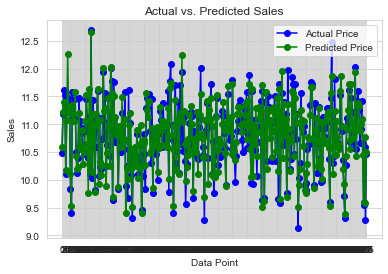

In [396]:
# Plot actual sales as a blue line
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price', marker='o', linestyle='-')

# Plot predicted sales as a green line
plt.plot(range(len(y_pred)), y_pred, color='green', label='Predicted Price', marker='o', linestyle='-')

# Customize the x-axis ticks (e.g., assuming each point corresponds to a time period)
x_ticks = [str(i) for i in range(len(y_test))]  # You can replace this with appropriate labels
plt.xticks(range(len(y_test)), x_ticks)

plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='best')
plt.grid(True)

plt.legend()
plt.show()

# Exporting the model

In [397]:
import pickle

In [398]:
pickle.dump(df,open('df.pkl','wb'))

In [399]:
pickle.dump(pipe,open('pipe.pkl','wb'))